# Importing all Required Libraries

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Reading Data

In [5]:
x_train = np.genfromtxt('x_train.csv', delimiter = ',')[1:, 1:]
x_validate = np.genfromtxt('x_validate.csv', delimiter = ',')[1:, 1:]
x_test = np.genfromtxt('x_test.csv', delimiter = ',')[1:, 1:]

In [9]:
y_train = np.genfromtxt('y_train.csv', delimiter = ',')[1:, 1:]
y_train = y_train.reshape(y_train.shape[0])

y_test = np.genfromtxt('y_test.csv', delimiter = ',')[1:, 1:]
y_test = y_test.reshape(y_test.shape[0])

y_validate = np.genfromtxt('y_validate.csv', delimiter = ',')[1:, 1:]
y_validate = y_validate.reshape(y_validate.shape[0])

## Base Line Model

In [13]:
clf = LogisticRegression(random_state = 0, max_iter = 7000)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [19]:
print(classification_report(y_test, y_pred))
print("\nAccuracy Score : ", accuracy_score(y_test, y_pred))
print("\n\n", "confusion matrix : \n\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       879
         2.0       1.00      1.00      1.00       888
         3.0       0.97      1.00      0.98       878
         4.0       0.91      0.96      0.93       897
         5.0       1.00      1.00      1.00       874
         6.0       0.98      0.99      0.98       883
         7.0       0.94      0.92      0.93       898
         8.0       1.00      0.93      0.96       843

    accuracy                           0.97      7040
   macro avg       0.97      0.97      0.97      7040
weighted avg       0.97      0.97      0.97      7040


Accuracy Score :  0.9732954545454545


 confusion matrix : 

 [[879   0   0   0   0   0   0   0]
 [  0 887   0   0   0   1   0   0]
 [  0   0 875   2   0   1   0   0]
 [  0   0   6 862   0   1  28   0]
 [  0   0   0   0 872   2   0   0]
 [  0   1   1   2   1 871   7   0]
 [  0   0   0  59   1  16 822   0]
 [  0   0  18  22   0   1  18 784]]


### Effecte of C on Acccuracy and Parameter tuning

In [21]:
def Parameter_Tuning(x_train_scaled, x_validate_scaled, y_train, y_validate):
    max_acc = -1
    c_max = 1 
    c_range = np.logspace(-4, 0, 10)
    train_accuracy_score_list = list()
    validate_accuracy_score_list = list()
    for c in c_range:
        
        # fitting model
        model = LogisticRegression(solver = 'lbfgs',C = c, random_state = 0, max_iter = 20000)
        model.fit(x_train_scaled, y_train)
        
        # validating model and obtaining validation score
        y_pred_validate = model.predict(x_validate_scaled)
        acc_validate = accuracy_score(y_validate, y_pred_validate)
        validate_accuracy_score_list.append(acc_validate)
        
        # obtaining training score
        y_pred_train = model.predict(x_train_scaled)
        acc_train = accuracy_score(y_train, y_pred_train)
        train_accuracy_score_list.append(acc_train)
        
        print('c : ', c, " accuracy_validate : ", acc_validate, " accuracy_train : ", acc_train)
        if max_acc < acc_validate:
            max_acc = acc_validate
            c_max = c
            
    print('\n\nBest C for better accuracy : ', c_max)
    return c_max, c_range, validate_accuracy_score_list, train_accuracy_score_list

c :  0.0001  accuracy_validate :  0.8946022727272728  accuracy_train :  0.8623078478964401
c :  0.0002782559402207126  accuracy_validate :  0.9198863636363637  accuracy_train :  0.9009911003236246
c :  0.000774263682681127  accuracy_validate :  0.9416193181818182  accuracy_train :  0.9326456310679612
c :  0.002154434690031882  accuracy_validate :  0.9568181818181818  accuracy_train :  0.9533778317152104
c :  0.005994842503189409  accuracy_validate :  0.9663352272727272  accuracy_train :  0.9670813106796117
c :  0.016681005372000592  accuracy_validate :  0.9717329545454545  accuracy_train :  0.9746662621359223
c :  0.046415888336127774  accuracy_validate :  0.9735795454545455  accuracy_train :  0.979470064724919
c :  0.12915496650148828  accuracy_validate :  0.9728693181818182  accuracy_train :  0.9833131067961165
c :  0.3593813663804626  accuracy_validate :  0.9727272727272728  accuracy_train :  0.98584142394822
c :  1.0  accuracy_validate :  0.9713068181818182  accuracy_train :  0.987

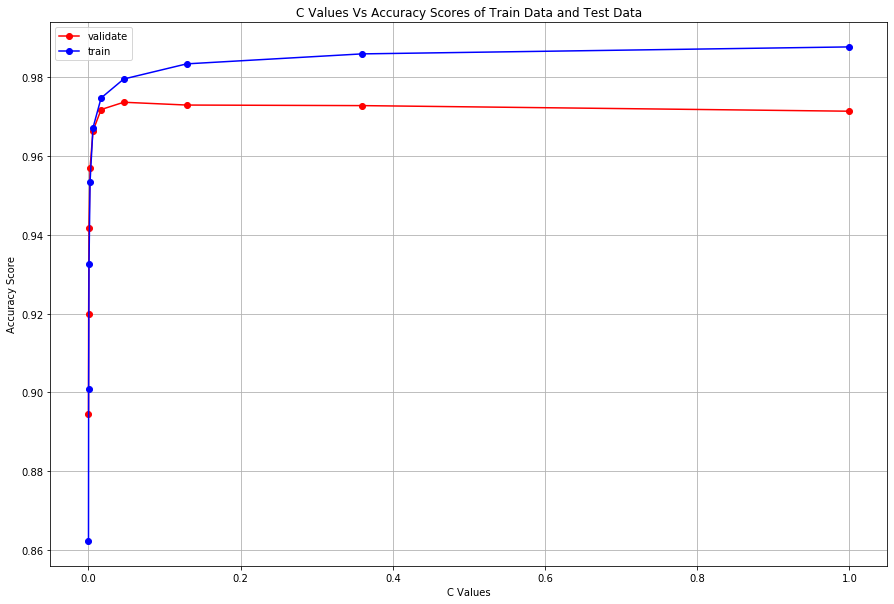

In [23]:
c_max, c_range, validate_accuracy_score_list, train_accuracy_score_list = Parameter_Tuning(x_train, x_validate, y_train, y_validate)
print('\n\n\n')
fig, ax = plt.subplots(figsize = (15, 10))
ax.plot(c_range, validate_accuracy_score_list, marker = 'o', color = 'red', label = 'validate')
ax.plot(c_range, train_accuracy_score_list, marker = 'o', color = 'blue', label = 'train')
ax.set_xlabel("C Values")
ax.set_ylabel("Accuracy Score")
ax.set_title("C Values Vs Accuracy Scores of Train Data and Test Data")
ax.legend()
plt.grid()
plt.show()

In [25]:
# fitting the model with train 
model = LogisticRegression(solver = 'lbfgs',C = c_max, random_state = 0, max_iter = 20000)
model.fit(x_train, y_train)

LogisticRegression(C=0.046415888336127774, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=20000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=0, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [26]:
# predicted output on test dataset
y_predict = model.predict(x_test)

In [27]:
# Model Analysis
classification_rep = classification_report(y_test, y_predict)
conf_mat = confusion_matrix(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(classification_rep)
print('\n\nConfusion Matrix : \n')
print(conf_mat)
print('\n\n Accuracy Score : ', accuracy)

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       879
         2.0       1.00      1.00      1.00       888
         3.0       0.98      0.99      0.99       878
         4.0       0.92      0.94      0.93       897
         5.0       0.99      0.99      0.99       874
         6.0       0.96      0.98      0.97       883
         7.0       0.93      0.92      0.92       898
         8.0       1.00      0.98      0.99       843

    accuracy                           0.97      7040
   macro avg       0.97      0.97      0.97      7040
weighted avg       0.97      0.97      0.97      7040



Confusion Matrix : 

[[875   0   4   0   0   0   0   0]
 [  0 887   0   0   0   1   0   0]
 [  0   0 867   8   1   2   0   0]
 [  0   0   7 839   1   2  48   0]
 [  0   0   0   0 867   7   0   0]
 [  0   3   3   2   1 864  10   0]
 [  0   0   0  53   3  20 822   0]
 [  0   0   1  14   0   0   4 824]]


 Accuracy Score :  0.9723011363636364


Text(114.0, 0.5, 'Actual Class')

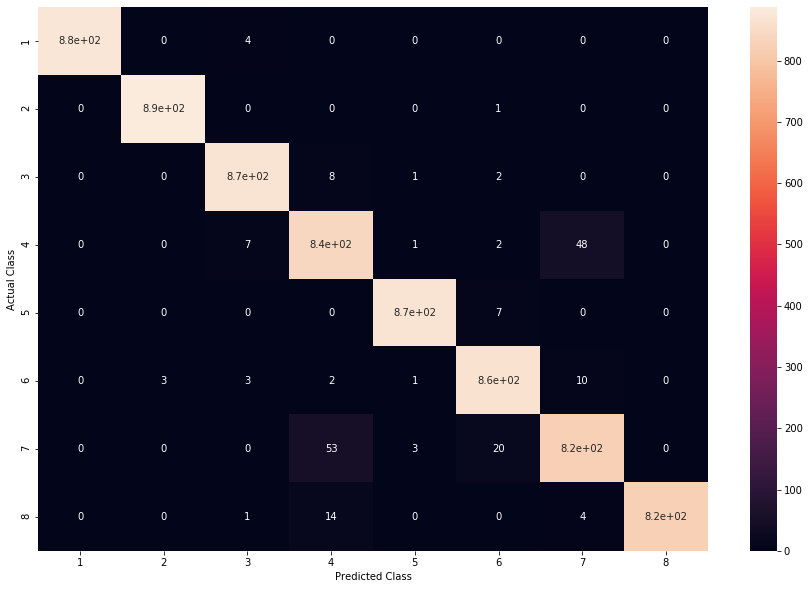

In [32]:
# visualization of the predicted class vs actual class (0 based indexing)
plt.figure(figsize = (15, 10))
classes = [i for i in range(1, 9)]
df = pd.DataFrame(conf_mat, index = classes, columns = classes)
sns.heatmap(df, annot = True)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')